In [ ]:
import os.path as path
if not path.exists("/content/gdrive"):
    !sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
    !sudo apt-get update -qq 2>&1 > /dev/null
    !sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
    !google-drive-ocamlfuse

    !sudo apt-get install -qq w3m # to act as web browser 
    !xdg-settings set default-web-browser w3m.desktop # to set default browser
    %cd /content
    !mkdir gdrive
    %cd gdrive
    !mkdir MyDrive
    %cd ..
    %cd ..
    !google-drive-ocamlfuse /content/gdrive/MyDrive



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [ ]:
!pip install anaconda h5py cython dill pandas

In [ ]:
!pip install pycocotools tqdm

In [ ]:
!pip install torch

In [ ]:
!pip install torchvision wandb

In [ ]:
!pip install opencv-python

In [ ]:
!git clone https://github.com/bknyaz/sgg.git

In [ ]:
%cd sgg

In [ ]:
%cd results/pretrain_GQA

In [ ]:
%cd ../../

In [ ]:
!python main.py -data ./data
# get data setup

In [ ]:
import torch
import numpy as np
import subprocess
import pandas as pd
import time
import pickle
import cv2
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from config import BOX_SCALE, IM_SCALE
from dataloaders.visual_genome import VGDataLoader, VG



data_dir = './data'
VG.split = 'gqa'  # set VG, GQA or VTE split here to use as a global variable
checkpoint_path = '/content/gdrive/MyDrive/gqa_sggen_62566.pth'  # 'gqa_sggen_62566.pth'
mode = 'sgdet'
device = 'cpu'
num_gpus = 1
backbone = 'resnet50'



In [ ]:
# Load GQA data
train_loader, eval_loaders = VGDataLoader.splits(data_dir=data_dir,
                                                 batch_size=1,
                                                 num_workers=0,
                                                 backbone=backbone,
                                                 square_pad=False,
                                                 filter_non_overlap=mode=='sgdet',
                                                 is_cuda=False)

In [ ]:
%cd ../

/content


In [ ]:
!git clone https://github.com/donggu-kang/sgg.git

Cloning into 'sgg'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 133 (delta 23), reused 22 (delta 22), pack-reused 105
Receiving objects: 100% (133/133), 5.99 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [ ]:
!cp -r sggold/data sdd/

^C


In [ ]:
%cd sgg

/content/sgg


In [ ]:
import torch
import numpy as np
import pandas as pd
import time
import pickle
import cv2
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from config import BOX_SCALE, IM_SCALE
from dataloaders.visual_genome import VGDataLoader, VG

In [ ]:
data_dir = '/content/sggold/data/'
VG.split = 'gqa'  # set VG, GQA or VTE split here to use as a global variable
checkpoint_path = '/content/gdrive/MyDrive/gqa_sggen_62566.pth'  # 'gqa_sggen_62566.pth'
mode = 'sgdet'
device = 'cpu'
num_gpus = 1
detector_model = 'mrcnn'

# should be loaded after settings some params
from lib.pytorch_misc import *
from lib.evaluation.sg_eval import BasicSceneGraphEvaluator, calculate_mR_from_evaluator_list, eval_entry
from lib.rel_model_stanford import RelModelStanford

In [ ]:
!conda uninstall torch torchvision

Solving environment: \ failed

PackagesNotFoundError: The following packages are missing from the target environment:
  - torch
  - torchvision




In [ ]:
ckpt = torch.load(checkpoint_path, map_location='cpu')
b = ckpt['state_dict'].copy()
val = b.pop('detector.backbone.fpn.inner_blocks.0.weight')
b['detector.backbone.fpn.inner_blocks.0.0.weight'] = val
val = b.pop('detector.backbone.fpn.inner_blocks.0.bias')
b['detector.backbone.fpn.inner_blocks.0.0.bias'] = val
val = b.pop('detector.backbone.fpn.inner_blocks.1.weight')
b['detector.backbone.fpn.inner_blocks.1.0.weight'] = val
val = b.pop('detector.backbone.fpn.inner_blocks.1.bias')
b['detector.backbone.fpn.inner_blocks.1.0.bias'] = val
val = b.pop('detector.backbone.fpn.inner_blocks.2.weight')
b['detector.backbone.fpn.inner_blocks.2.0.weight'] = val
val = b.pop('detector.backbone.fpn.inner_blocks.2.bias')
b['detector.backbone.fpn.inner_blocks.2.0.bias'] = val
val = b.pop('detector.backbone.fpn.inner_blocks.3.weight')
b['detector.backbone.fpn.inner_blocks.3.0.weight'] = val
val = b.pop('detector.backbone.fpn.inner_blocks.3.bias')
b['detector.backbone.fpn.inner_blocks.3.0.bias'] = val

val = b.pop('detector.backbone.fpn.layer_blocks.0.weight')
b['detector.backbone.fpn.layer_blocks.0.0.weight'] = val
val = b.pop('detector.backbone.fpn.layer_blocks.0.bias')
b['detector.backbone.fpn.layer_blocks.0.0.bias'] = val
val = b.pop('detector.backbone.fpn.layer_blocks.1.weight')
b['detector.backbone.fpn.layer_blocks.1.0.weight'] = val
val = b.pop('detector.backbone.fpn.layer_blocks.1.bias')
b['detector.backbone.fpn.layer_blocks.1.0.bias'] = val
val = b.pop('detector.backbone.fpn.layer_blocks.2.weight')
b['detector.backbone.fpn.layer_blocks.2.0.weight'] = val
val = b.pop('detector.backbone.fpn.layer_blocks.2.bias')
b['detector.backbone.fpn.layer_blocks.2.0.bias'] = val
val = b.pop('detector.backbone.fpn.layer_blocks.3.weight')
b['detector.backbone.fpn.layer_blocks.3.0.weight'] = val
val = b.pop('detector.backbone.fpn.layer_blocks.3.bias')
b['detector.backbone.fpn.layer_blocks.3.0.bias'] = val

val = b.pop('detector.roi_heads.mask_head.mask_fcn1.weight')
b['detector.roi_heads.mask_head.0.0.weight'] = val

val = b.pop('detector.roi_heads.mask_head.mask_fcn2.weight')
b['detector.roi_heads.mask_head.1.0.weight'] = val

val = b.pop('detector.roi_heads.mask_head.mask_fcn3.weight')
b['detector.roi_heads.mask_head.2.0.weight'] = val

val = b.pop('detector.roi_heads.mask_head.mask_fcn4.weight')
b['detector.roi_heads.mask_head.3.0.weight'] = val

val = b.pop('detector.roi_heads.mask_head.mask_fcn1.bias')
b['detector.roi_heads.mask_head.0.0.bias'] = val

val = b.pop('detector.roi_heads.mask_head.mask_fcn2.bias')
b['detector.roi_heads.mask_head.1.0.bias'] = val

val = b.pop('detector.roi_heads.mask_head.mask_fcn3.bias')
b['detector.roi_heads.mask_head.2.0.bias'] = val

val = b.pop('detector.roi_heads.mask_head.mask_fcn4.bias')
b['detector.roi_heads.mask_head.3.0.bias'] = val

val = b.pop('detector.rpn.head.conv.weight')
b['detector.rpn.head.conv.0.0.weight'] = val

val = b.pop('detector.rpn.head.conv.bias')
b['detector.rpn.head.conv.0.0.bias'] = val

In [ ]:
success = optimistic_restore(detector, b)


In [ ]:
val_loader

In [ ]:
train, val_splits = VG.splits(data_dir=data_dir,
                              num_val_im=5000,
                              mrcnn=detector_model == 'mrcnn',
                              min_graph_size=-1,
                              max_graph_size=-1,
                              filter_non_overlap=mode == 'sgdet')

train_loader, val_loaders = VGDataLoader.splits(train, val_splits,
                                               mode='rel',
                                               batch_size=1,
                                               num_workers=0,
                                               num_gpus=1)
val_loader, val_loader_zs, test_loader, test_loader_zs = val_loaders

detector = RelModelStanford(train_data=train,
                            num_gpus=1,
                            mode=mode,
                            use_bias=False,
                            detector_model=detector_model,
                            RELS_PER_IMG=1024)

print("Loading EVERYTHING from %s" % checkpoint_path)
ckpt = torch.load(checkpoint_path, map_location='cpu')
success = optimistic_restore(detector, b)

assert success, 'something wrong when loading the detector'
detector.to(device)
detector.eval()
detector.detector.eval()
detector.detector.mode = 'refinerels' if mode == 'sgdet' else 'gtbox'
print('done')


TRAIN DATASET
Loading GQA-train image ids...
train 67140

ind_to_classes 1704 ['__background__', 'accessory', 'action figure', 'air', 'air conditioner', 'aircraft', 'airplane', 'airplanes', 'airport', 'alarm clock', 'alcohol', 'alien', 'alligator', 'almond', 'almonds', 'ambulance', 'american flag', 'amusement park', 'anchovies', 'angry bird', 'animal', 'animals', 'antelope', 'antelopes', 'antenna', 'antennas', 'apartment', 'apartment building', 'appetizer', 'appetizers', 'apple', 'apple logo', 'apples', 'appliance', 'apron', 'aquarium', 'arm', 'armchair', 'armor', 'arms', 'arrow', 'artichoke', 'artichokes', 'artwork', 'asparagus', 'athlete', 'athletic shoe', 'attic', 'audience', 'auditorium', 'avocado', 'avocados', 'baby', 'backpack', 'backpacks', 'backyard', 'bacon', 'bag', 'bagel', 'bagels', 'bags', 'baked good', 'baked goods', 'baker', 'bakery', 'baking pan', 'baking sheet', 'balcony', 'ball', 'balloon', 'balloons', 'balls', 'banana', 'banana bunch', 'banana bunches', 'banana peel'

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading EVERYTHING from /content/gdrive/MyDrive/gqa_sggen_62566.pth
done


In [ ]:
torch.__version__

'1.13.1+cu116'

In [ ]:
rnd = np.random.RandomState(12345)
node_colors_fixed = rnd.randint(255, size=(1000, 3)).astype(np.uint8)

def get_color(obj):
    return node_colors_fixed[obj]


def draw_boxes(im, classes, bboxes, rels=None):
    k = 512. / np.max(im.shape)
    im = cv2.resize(im, (int(im.shape[1] * k), int(im.shape[0] * k)))
    bboxes = bboxes.copy() * k
    im = ((im - im.min()) / (im.max() - im.min()) * 255).astype(np.uint8)
    for obj, (cls, bbox) in enumerate(zip(classes, bboxes)):
        if rels is not None and (np.sum([rel[0] == obj for rel in rels]) +
                                 np.sum([rel[1] == obj for rel in rels])) == 0:
            continue
        bbox = np.round(bbox.copy()).astype(np.int)
        bbox[0] = np.clip(bbox[0], 1, im.shape[1] - 2)
        bbox[2] = np.clip(bbox[2], 1, im.shape[1] - 2)
        bbox[1] = np.clip(bbox[1], 1, im.shape[0] - 2)
        bbox[3] = np.clip(bbox[3], 1, im.shape[0] - 2)
        color = get_color(obj)[::-1]  # RGB
        color = (int(color[0]), int(color[1]), int(color[2]))   # to get around numpy cv2 issue
        cv2.rectangle(im, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 4)
        cv2.rectangle(im, (bbox[0], bbox[1]), (bbox[0] + len(cls) * 10, bbox[1] + 20), color, -1)
        cv2.putText(im, cls, (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    return im

def filter_dups(gt_rels):
    all_rel_sets = defaultdict(list)
    for (o0, o1, r) in gt_rels:
        all_rel_sets[(o0, o1)].append(r)
    gt_rels = [(k[0], k[1], v[0]) for k,v in all_rel_sets.items()]  # for visualizations always use the first edge in case of multiple edges
    return gt_rels

def vis_nx_graph(classes, boxes, rels, test_set=None, 
                 edge_label_pos=0.5, name=None):
    G = nx.DiGraph()
    node_labels = {}
    node_size = []
    rels = filter_dups(rels)
    node_colors = []  # BGR
    edgecolors = []
    linewidth = []
    k = 512. / np.max(boxes)
    boxes = boxes * k
    for obj, lbl in enumerate(classes):
        obj_name = train.ind_to_classes[lbl]
        G.add_node(obj, label=obj_name)
        node_labels[obj] = obj_name
        node_size.append( 10 * ((boxes[obj][2] - boxes[obj][0]) * (boxes[obj][3] - boxes[obj][1]) ** 0.1 ))
        # predefined colors for the paper
        node_colors.append(get_color(obj))

        # highlight perturbed nodes
        edgecolors.append([200, *node_colors[-1]])
        linewidth.append(1)

    edge_labels = {}
    edges = {}
    for rel_id, rel in enumerate(rels):
        triplet = '{}_{}_{}'.format(classes[rel[0]], rel[2], classes[rel[1]])
        #print(triplet)        
        is_zs = (triplet not in train.triplet_counts) and (triplet not in val_loader.dataset.triplet_counts)
        key = '{}_{}'.format(rel[1], rel[0])

        # heuristic to select a single edge between a pair of nodes for visualization
        if key in edges:
            if is_zs or edge_labels[(rel[1], rel[0])].split('-')[0] != 'near':  # for the figures in the paper
                G.remove_edge(rel[1], rel[0])
                del edge_labels[(rel[1], rel[0])]
            else:
                continue
        assert (rel[1], rel[0]) not in edge_labels, (rel, edge_labels, key, edges)
        edges['{}_{}'.format(rel[0], rel[1])] = rel_id
        G.add_edge(*rel[:2], color='red' if is_zs else 'blue', weight=3. if is_zs else 1.)
        G[rel[0]][rel[1]]['color'] = 'red' if is_zs else 'blue'
        G[rel[0]][rel[1]]['weight'] = 8. if is_zs else 1.
        edge_labels[tuple(rel[:2])] = train.ind_to_predicates[rel[2]]

    pos = nx.circular_layout(G)
    edges = G.edges()
    colors = [G[u][v]['color'] for u, v in edges]
    weights = [G[u][v]['weight'] for u, v in edges]
    font_size = 22
    fig, ax = plt.subplots(figsize=(10, 5))
    nx.draw(G, pos=pos, with_labels=False, node_size=node_size,
            node_color=np.array(node_colors)[:, ::-1] / 255., alpha=0.6,
            edge_color=colors, width=weights, edgecolors=np.array(edgecolors)[:, ::-1] / 255., linewidths=np.array(linewidth),
            arrowstyle='-|>',
            arrowsize=30,
            # connectionstyle='angle3,angleA=90,angleB=0',  # does not properly place edge labels
            ax=ax)
    nx.draw_networkx_labels(G, pos=pos, labels=node_labels, font_weight='bold',
                            font_size=max(font_size, min(24, 50 / len(node_size))))
    nx.draw_networkx_edge_labels(G, pos=pos,
                                 label_pos=edge_label_pos,
                                 edge_labels=edge_labels, font_color='black',
                                 font_size=font_size - 8)
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1.2, 1.2)
    plt.tight_layout()
    if name is not None:
        plt.savefig('%s.png' % name, transparent=True, bbox_inches='tight')
    plt.show()
    

def val_batch(batch_num, b, eval_m, val_dataset, max_obj=10, max_rels=20):

    if detector_model == 'mrcnn':
        scale = 1.
        box_threshs = [0.2, 0.05, 0.01]
    else:
        scale = BOX_SCALE / IM_SCALE
        box_threshs = [None]

    pred_entries = []
    for box_score_thresh in box_threshs:
        detector.set_box_score_thresh(box_score_thresh)
        try:
            det_res = detector.forward_parallel(b)  # keep as it was in the original code

            if num_gpus == 1:
                det_res = [det_res]

            for i, (boxes_i, objs_i, obj_scores_i, rels_i, pred_scores_i) in enumerate(det_res):

                if len(val_dataset.gt_classes[batch_num + i]) > max_obj:
                    print('skipping a scene graph with too many objects')
                    continue
                    
                if VG.split == 'stanford':
                    w, h = b[i][1][0, :2]
                    scale_gt = 1. / (BOX_SCALE / max(w, h))
                else:
                    scale_gt = 1.

                gt_entry = {
                    'gt_classes': val_dataset.gt_classes[batch_num + i].copy(),
                    'gt_relations': val_dataset.relationships[batch_num + i].copy(),
                    'gt_boxes': val_dataset.gt_boxes[batch_num + i].copy() * scale_gt,
                }

                pred_entry = {
                    'pred_boxes': boxes_i * scale,
                    'pred_classes': objs_i,
                    'pred_rel_inds': rels_i,
                    'obj_scores': obj_scores_i,
                    'rel_scores': pred_scores_i,  # hack for now.
                }
                pred_entries.append(pred_entry)
                
                print(val_dataset.filenames[batch_num + i], 'showing ground truth')
                im_gt = draw_boxes(b[0][0][0].permute(1,2,0).data.cpu().numpy().copy(), 
                                   [train.ind_to_classes[c] for c in gt_entry['gt_classes']], 
                                   gt_entry['gt_boxes'])
                plt.figure(figsize=(10,10))
                plt.imshow(im_gt)
                plt.axis(False)
                plt.show()
                
                vis_nx_graph(gt_entry['gt_classes'], 
                             gt_entry['gt_boxes'], 
                             gt_entry['gt_relations'], 
                             test_set=test_loader_zs.dataset)
                
                print(val_dataset.filenames[batch_num + i], 'showing top %d relationships' % max_rels)
                im_pred = draw_boxes(b[0][0][0].permute(1,2,0).data.cpu().numpy().copy(), 
                                     [train.ind_to_classes[c] for c in pred_entry['pred_classes']], 
                                     pred_entry['pred_boxes'])
                plt.figure(figsize=(10,10))
                plt.imshow(im_pred)
                plt.axis(False)
                plt.show()
                
                obj_scores = pred_entry['obj_scores']
                pred_rel_inds = rels_i
                obj_scores_per_rel = obj_scores[pred_rel_inds].prod(1)
                overall_scores = obj_scores_per_rel[:,None] * pred_entry['rel_scores'][:,1:]
                score_inds = argsort_desc(overall_scores)[:max_rels]
                pred_rels = np.column_stack((pred_rel_inds[score_inds[:,0]], score_inds[:,1]+1))
                
                vis_nx_graph(pred_entry['pred_classes'], 
                             pred_entry['pred_boxes'], 
                             pred_rels, 
                             test_set=test_loader_zs.dataset)
            
            return pred_entries

        except (ValueError, IndexError) as e:
            print('no objects or relations found'.upper(), e, b[0][-1], 'trying a smaller threshold')


def val_epoch(loader, name, n_batches=-1, is_test=True, max_obj=10, max_rels=20):
    print('\nEvaluate %s %s triplets' % (name.upper(), 'test' if is_test else 'val'))
    #detector.context.mode = mode
        
    with torch.no_grad():
        eval_m = mode
        detector.mode = eval_m
        print('\nEvaluating %s...' % eval_m.upper())
        # For all val/test batches
        for val_b, batch in enumerate(loader):
            pred_entry = val_batch(val_b, batch, eval_m, loader.dataset, max_obj=max_obj, max_rels=max_rels)
            if n_batches > -1 and val_b + 1 >= n_batches:
                break


Evaluate TEST_ZS test triplets

Evaluating SGDET...


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


1001.jpg showing ground truth


<ipython-input-42-744300ceec80>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bbox = np.round(bbox.copy()).astype(np.int)


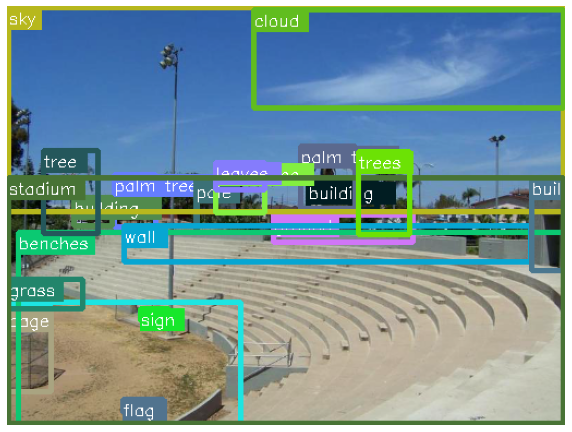

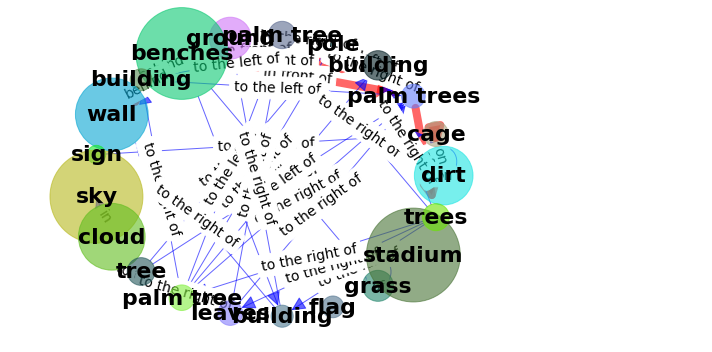

1001.jpg showing top 50 relationships


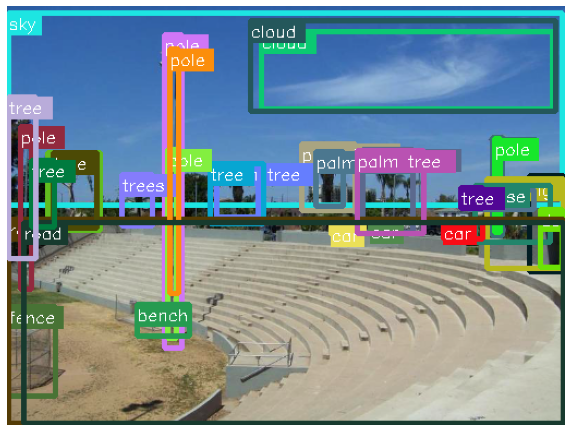

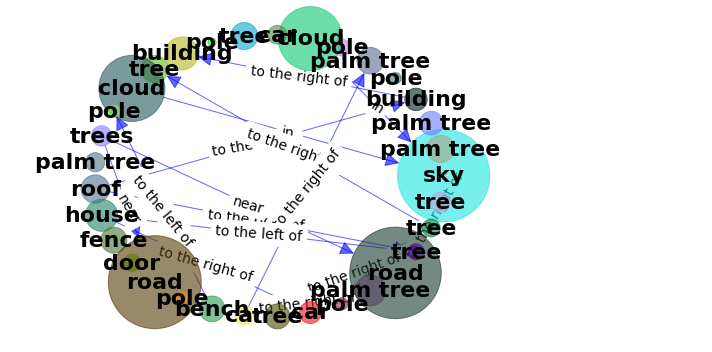

1016.jpg showing ground truth


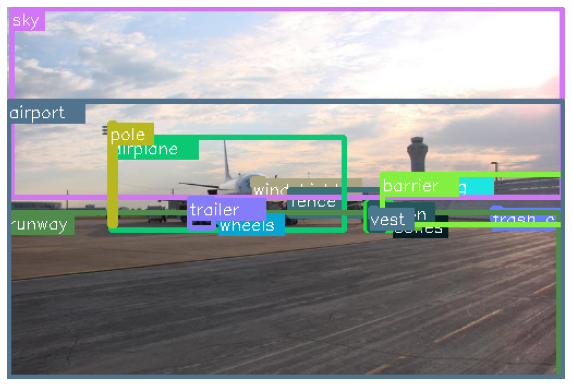

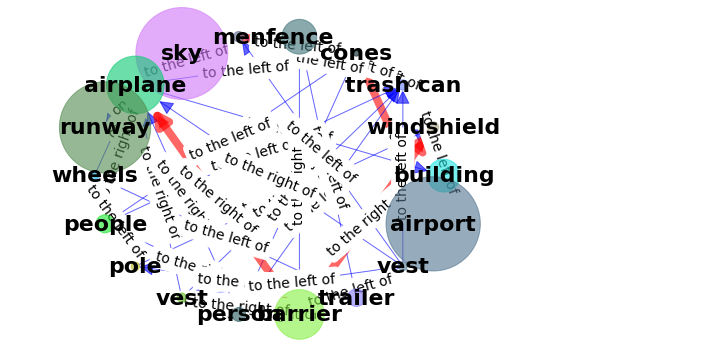

1016.jpg showing top 50 relationships


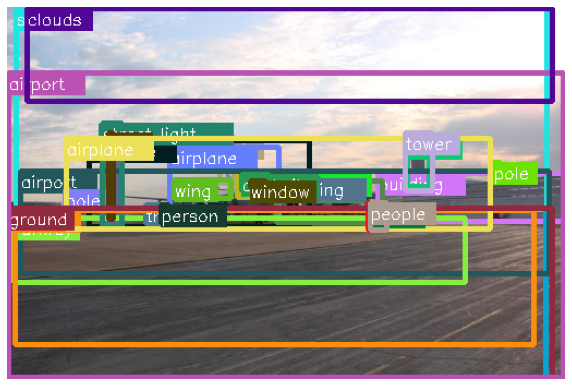

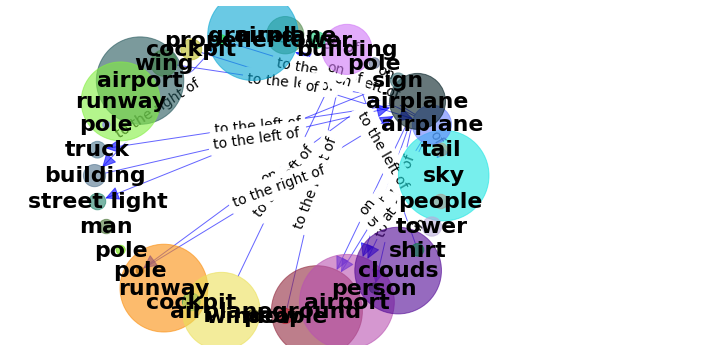

1054.jpg showing ground truth


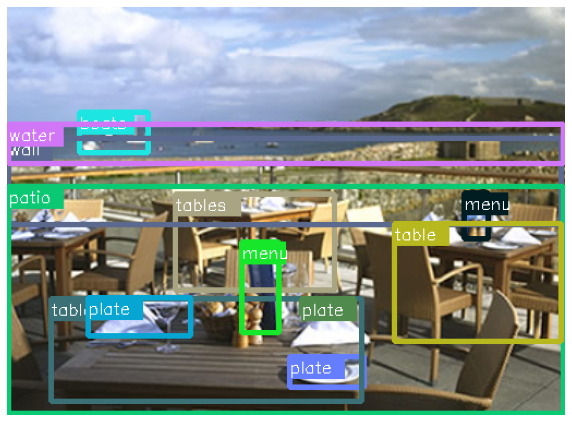

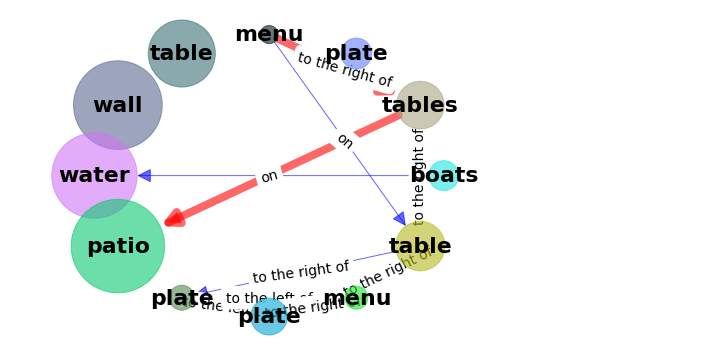

1054.jpg showing top 50 relationships


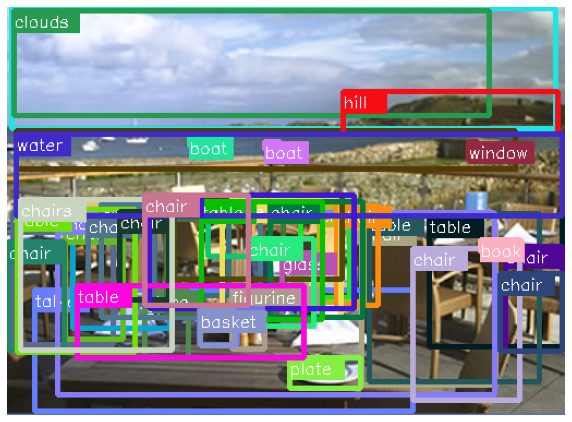

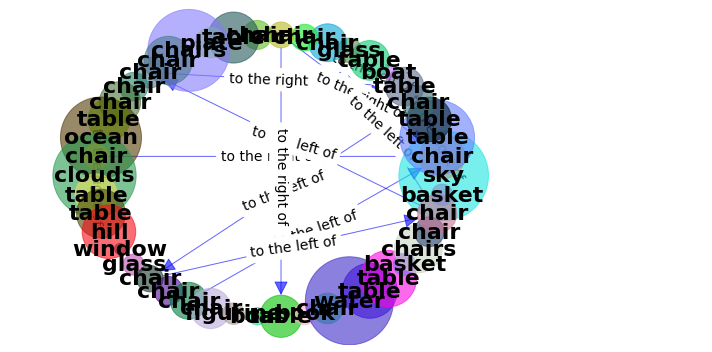

1057.jpg showing ground truth


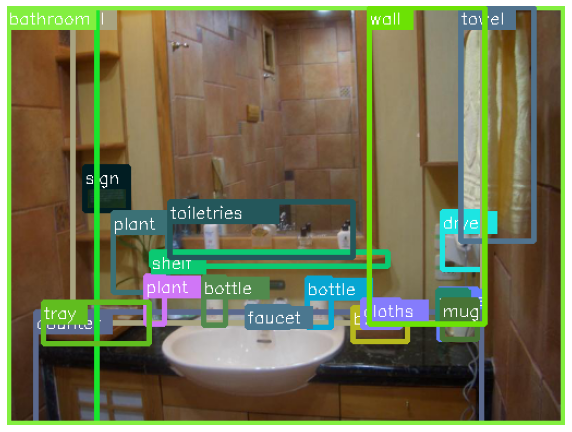

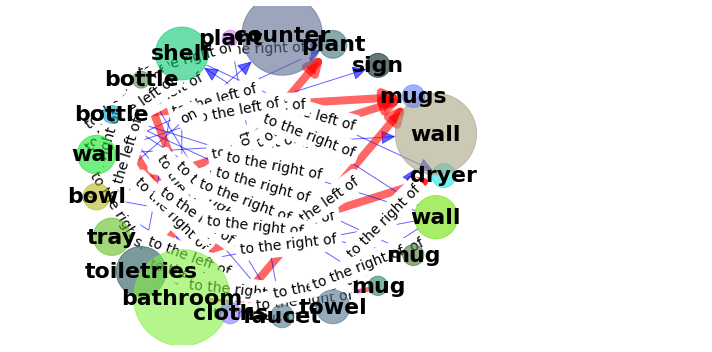

1057.jpg showing top 50 relationships


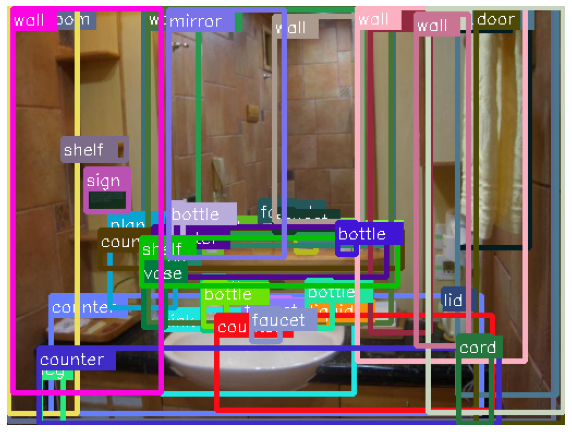

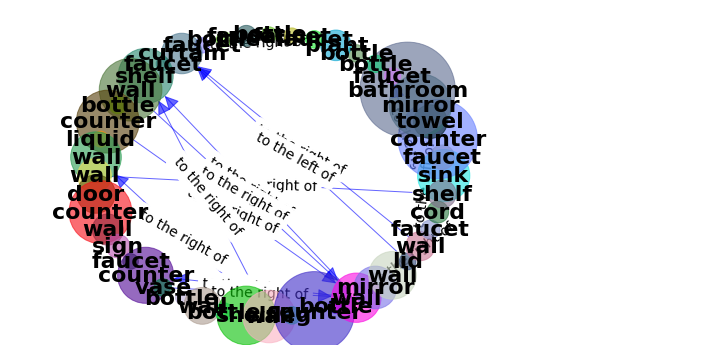

1058.jpg showing ground truth


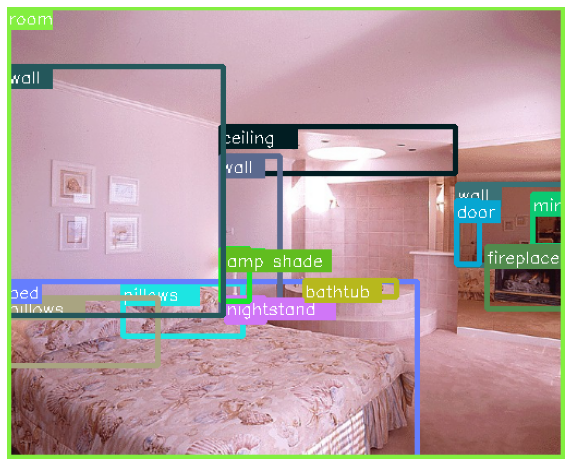

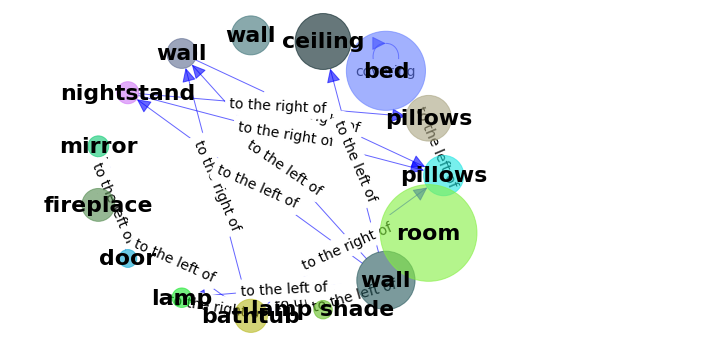

1058.jpg showing top 50 relationships


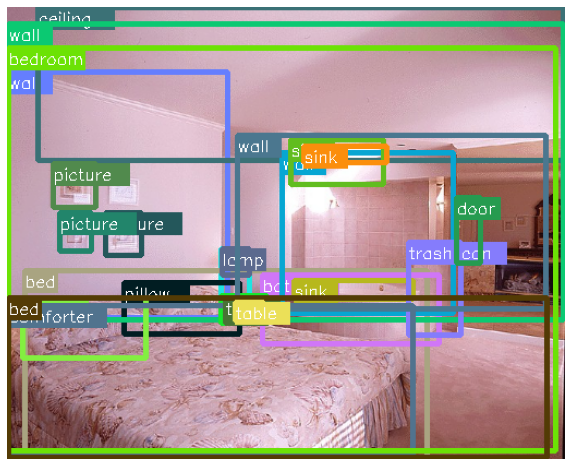

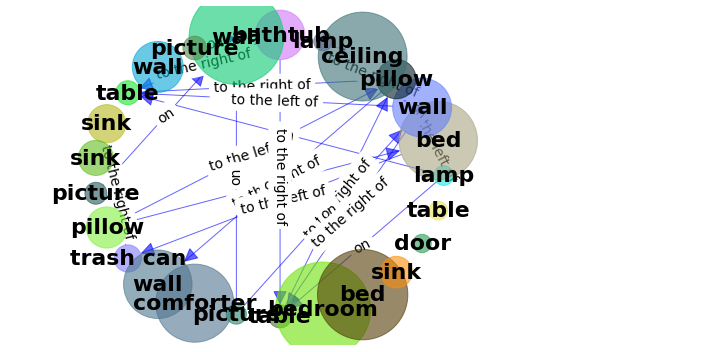

1066.jpg showing ground truth


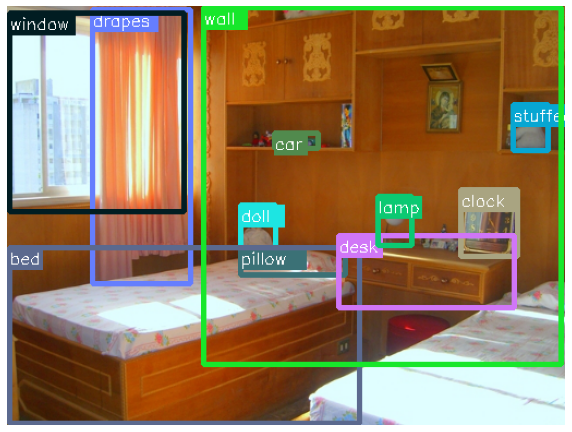

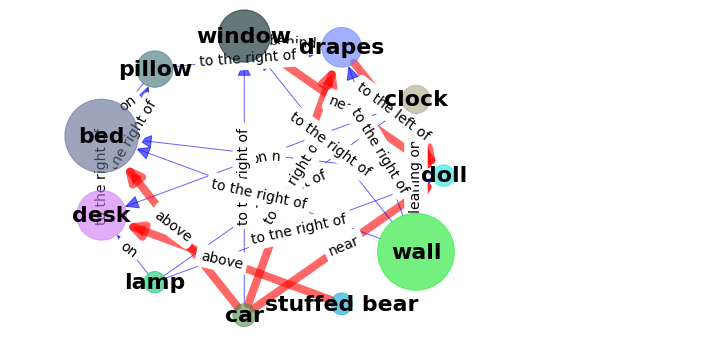

1066.jpg showing top 50 relationships


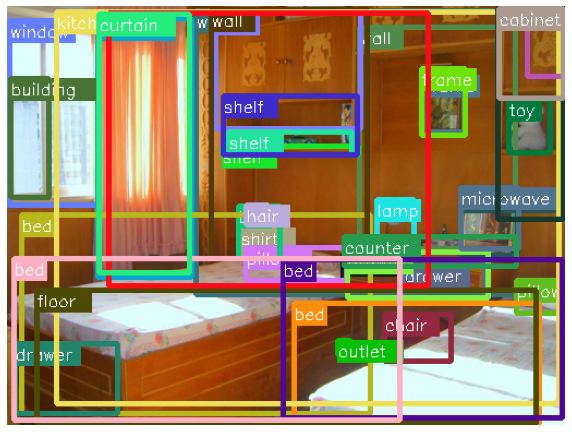

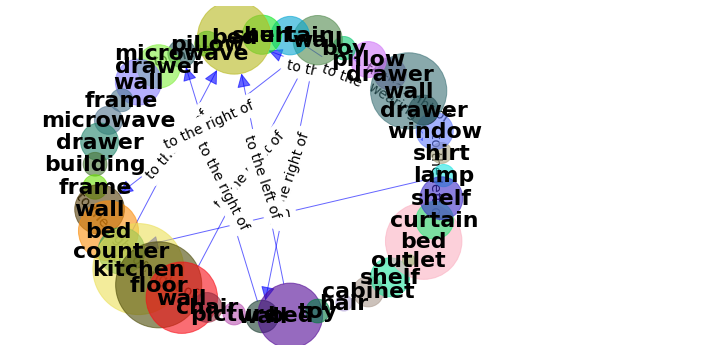

skipping a scene graph with too many objects
1074.jpg showing ground truth


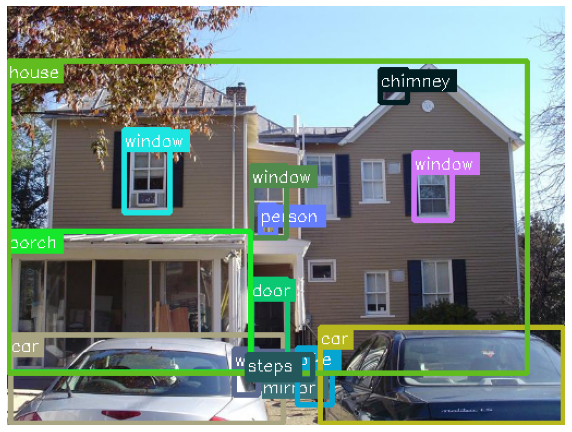

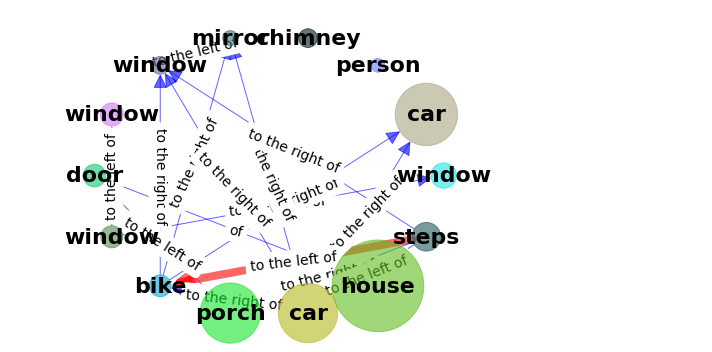

1074.jpg showing top 50 relationships


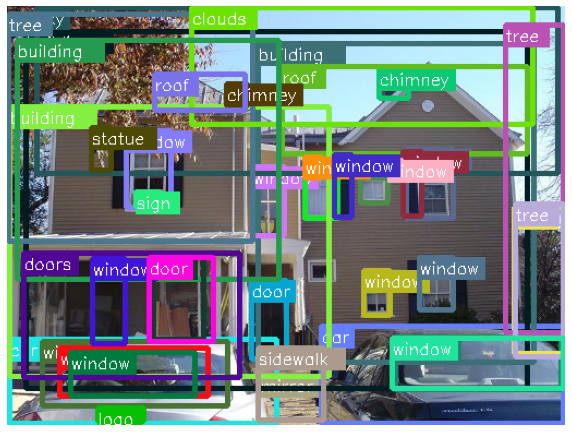

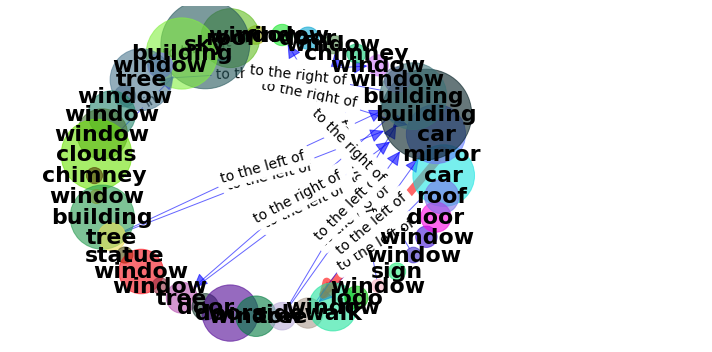

107903.jpg showing ground truth


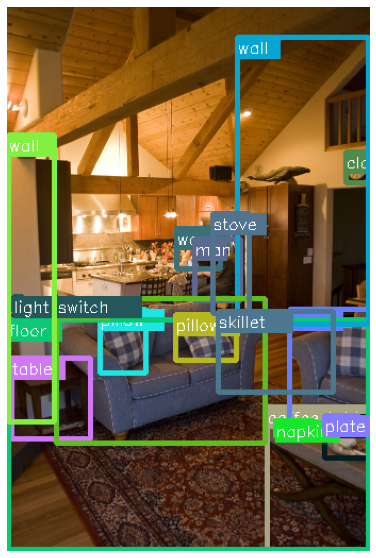

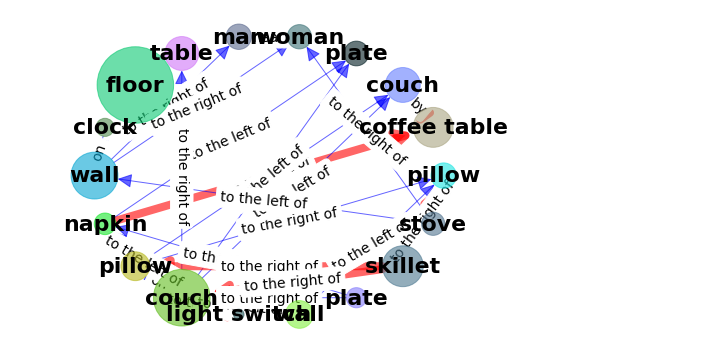

107903.jpg showing top 50 relationships


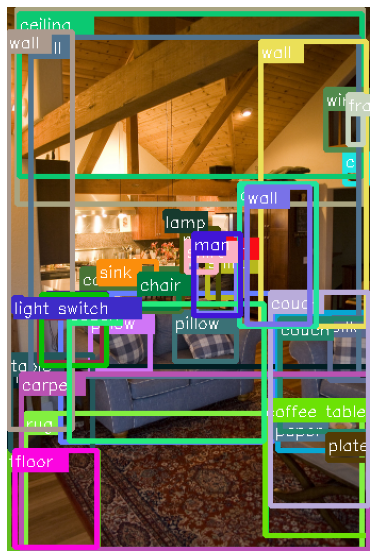

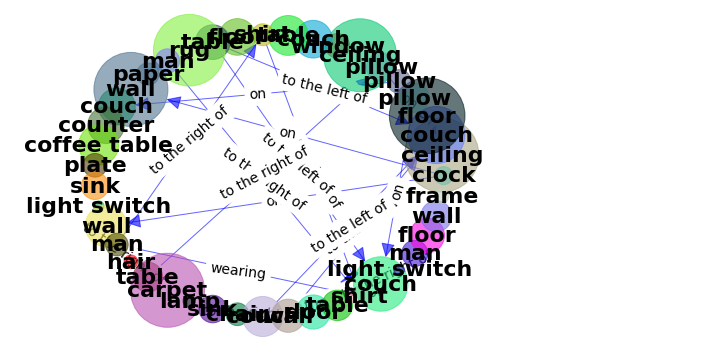

skipping a scene graph with too many objects


In [ ]:
# Let's visualize ground truth and predictions for test scene graphs
val_epoch(test_loader, 'test_zs', n_batches=10, max_obj=30, max_rels=50)
